# Imersão de Dados 3 - Alura

## Introdução

Nessa 3ª edição da imersão da Alura, vamos trabalhar com um dataset do ramo de ```Drug Discovery```

# Aula 01

## 0. Importando bibliotecas e dataset

### 0.1. Bibliotecas

Aqui vamos importar algumas bibliotecas que usaremos na nossa analise da primeira aula da imersão, conforme o andar da imersão, pode ser carregadas mais bibliotecas de acordo com a necessidade do momento.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 0.2. Datasets

Vamos importar nosso dataset que sera realizado a análise, onde foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no kaggle, de acordo com as informações passadas na pagina da imersão no site da alura. 

https://www.alura.com.br/imersao-dados/aula01-python-pandas-farmacologia?utm_campaign=imersao_dados_3_aulas_aula_1&utm_medium=email&utm_source=RD+Station

Importante salientar que na importação dos dados abaixo, foi utilizado um método para importar o arquivo csv dentro de um zip, sendo assim, não havendo a necessadidade de descompactação, consequentemente, havendo uma economia de tempo e espaço em disco caso utilize um dataset em seu disco rigido.

In [2]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

In [3]:
dataset = pd.read_csv(url_dados, compression='zip')

## 1. Entendendo o dataset

Nessa seção vamos estar visualizando o dataset para ter um melhor entendimento da estrutura e das informações que constam nesse dataset.

Na seção anterior definimos ```dataset``` como a variável que na qual puxa os dado do github da Alura. Vamos chamar essa variável e visualizar somente as primeiras 5 linhas com a função .head(), que como padrão é definido 5 linhas.

In [4]:
dataset.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Conforme podemos visualizar no dataset impresso, de acordo com a Especialista Vanessa Leiko Oikawa Cardoso, cada linha mostra uma cultura de célula, onde cada cultura de célula foi submetido uma droga, e registrado os efeitos.

Agora vamos verificar a quantidade de linhas e colunas que contem em nosso dataset.

In [5]:
print("Linhas: {}\nColunas: {}".format(dataset.shape[0],dataset.shape[1]))

Linhas: 23814
Colunas: 877


### 1.1. Colunas

Vamos analisar algumas colunas desse dataset para ter uma visão melhor do que vamos estar trabalhando

#### 1.1.1. Coluna 'Tratamento'

Vamos identificar os valores unicos que existem em cada coluna, com a função ```.unique()``` podemos estar visualizando.

In [6]:
dataset['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Conforme resultado apresentado acima, temos duas variáveis, ```com_droga``` e ```com_controle```, quando é realizado um experimento, é de pratica registrar as variaveis ```normais```, nesse caso em específico, a variável ```com_controle```, onde não foi realizado nenhuma aplicação de droga, e é registrado a variavel ```com_droga```, que no caso, é a variavel que demonstra os efeitos, a variação em relação a variavel ```com_controle```.
<p>Em estatística, isso é conhecido como experimentação.</p>

Vamos verificar frequencia em cada variavel que consta nessa coluna ```tratamento```.

In [7]:
dataset['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [8]:
round(dataset['tratamento'].value_counts(normalize=True) *100) #dados percentuais

com_droga       92.0
com_controle     8.0
Name: tratamento, dtype: float64

<AxesSubplot:ylabel='tratamento'>

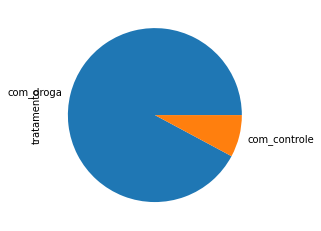

In [9]:
dataset['tratamento'].value_counts().plot.pie()

Concluímos na análise da coluna de tratamento que 92% do dataset é em relação a variável ```com_droga```, e os outros 8% é ```com_controle```.

#### 1.1.2. Coluna 'Tempo'

Vamos agora checar a coluna tempo

In [10]:
dataset['tempo'].unique()

array([24, 72, 48], dtype=int64)

A coluna ```tempo```, é um registro de quanto em quanto tempo é analisado o efeito da droga na cultura de celula, que seria o tempo de esposição. É feito essa coleta em tempos diferentes pois pode acontecer de o efeito da droga não ter surtido efeito em um certo período de tempo, então é realizado em períodos diferentes para verificiar o efeito.

<p>Nesse caso temos analise de 24, 48 e 72 horas.</p>

<AxesSubplot:ylabel='tempo'>

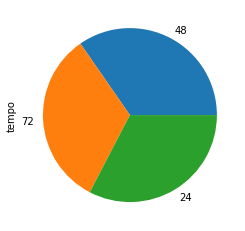

In [11]:
dataset['tempo'].value_counts().plot.pie()

<p>Conforme observado, utilizar grafico de pizza não é tão viável quando temos dados balanceados, na variavel tratamento pode-se ter uma visualização melhor, mas no caso da variavel tempo, como os dados são balanceados, é difícil visualizar o desvio de cada variável.</p>
<p>Vamos tentar novamente, só que dessa vez com o grafico de barras</p>

<AxesSubplot:>

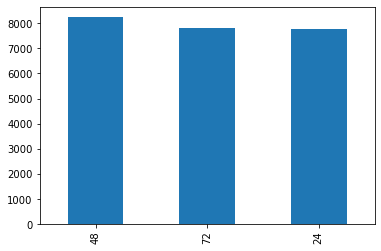

In [12]:
dataset['tempo'].value_counts().plot.bar()

<p>Conforme observado, o grafico de barras é muito mais útil, fácil e muito mais utilizado para visualização de dados, pois com ele é possivel fazer uma melhor análise em relação a informação.</p>
<p>Analisando o gráfico de barras, podemos concluir temos como maior frequencia, a coleta em 48 horas.</p>

#### 1.1.3. Coluna 'Dose'

Vamos checar a coluna ```Dose```

In [13]:
dataset['dose'].unique()

array(['D1', 'D2'], dtype=object)

Na celula anterior, visualizamos os valores únicos da coluna ```Dose```, podemos concluir que foi aplicada em cada cultura de celula, somente duas doses, ```D1``` e ```D2```.

In [14]:
dataset['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [15]:
round(dataset['dose'].value_counts(normalize=True)*100) #dados percentuais

D1    51.0
D2    49.0
Name: dose, dtype: float64

Analisando a coluna ```Dose```, podemos concluir que ela tem os dados balanceados, 51% foi realizado somente uma dose e 49% foi realizado duas doses.

#### 1.1.4. Coluna 'Droga'

Vamos checar a coluna ```Droga```

In [16]:
dataset['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Como já era esperado, de acordo com a primeira visualização que fizemos do dataset, a coluna droga contem diversos valores, que no caso, é uma identificação de cada droga que foi aplicada.

#### 1.1.5. Coluna 'G-0'

Vamos dar uma olhada na coluga ```g-0```.
<br>
As colunas ```g``` é classificada como o os efeitos que foi causada de acordo com cada droga aplicada, no caso essa coluna é referente a cada gene.

In [17]:
dataset['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

<p>Conforme mencionado no notebook e na aula da imersão da Alura, é bem comum no meio científico a realização da normalização dos dados, para que não haja uma discrepancia na distribuição desses valores, basicamente colocando os valores em uma mesma escala, em que o meio dessa distribuição seja 0.</p>

<p>Para conseguirmos visulizar os dados acima ou abaixo de 0 precisamos aplicar um filtro na tabela para a visualização dos mesmos.</p>

Abaixo, vamos visualizar os dados que estão acima de ```0```.

In [18]:
dataset_filtrados = dataset[dataset['g-0'] > 0]
dataset_filtrados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


## 2. Desafios

### Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?

Para entender o por que dos dados estar desbalanceados, vamos partir da primícia que, anteriomente já realizamos algumas análises em algumas colunas, as colunas ```tratamento```, ```tempo```, ```dose``` e ```droga``` foram feitos algumas análises, porém, a coluna ```droga``` é a coluna que contem muitos valores unicos, vamos análisar essa coluna.


In [19]:
dataset.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [20]:
dataset['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [21]:
dataset['droga'].value_counts().sort_values(ascending=False).head(10)

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: droga, dtype: int64

In [22]:
dataset.query('tratamento == "com_controle"').shape

(1866, 877)

In [23]:
dataset[dataset['droga'] == 'cacb2b860']['tratamento'].value_counts()

com_controle    1866
Name: tratamento, dtype: int64

Conforme podemos observar, o tratamento ```com_controle``` foi utilizado somente com a droga ```cacb2b860``` que contem 1866 dados registrados.

### Desafio 02: Plotar as 5 últimas linhas da tabela

Para visualização das últimas 5 linhas de um dado dataframe, podemos utilizar a função ```.tail()``` para essa  visualização, tanto ```.tail()``` como ```.head()```, tem como padrão a visualização de 5 linhas.

In [24]:
dataset.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### Desafio 03: Proporção das classes tratamento.

Para o calculo da proporção das classes da coluna ```tratamento``` vamos utilizar a função ```.value_counts()``` só que vamos usar a propriedade ```normalize = True``` para retornar a frequencia relativa desses dados.

In [25]:
dataset['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Se multiplicarmos por 100 os valores acima, teremos a porcentagem, porém vamos tentar de uma maneira diferente, vamos utilizar a função ```.mul(FATOR)``` no caso o nosso fator é 100 então será: ```.mul(100)``` e utiizaremos a função ```.round(1)``` para arredondar e nos apresentar uma casa decimal e vamos utilizar tambem a função ```.astype(str)``` para converter o resultado para string e acrescentar o sinal de porcentagem.

In [26]:
dataset['tratamento'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

com_droga       92.2%
com_controle     7.8%
Name: tratamento, dtype: object

### Desafio 04: Quantos tipos de drogas foram investigados.


Para verificar a quantidade de drogas utilizadas nesse dataset, podemos usar a função ```.unique()``` que nesse caso puxa os valores unicos de acordo com uma coluna selecionada, juntamente com a função ```len()``` que faz a leitura do tamanho de uma lista definida.

In [27]:
dataset['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Conforme podemos visualizar acima, utilizando a função ```.unique()``` conseguimos visualizar os valores unicos que constam nessa coluna. Agora utilizar com a ```.unique()``` a função ```len()``` que conforme explicado anteriormente, ela faz a leitura do tamanho da lista que queremos análisar.

In [28]:
len(dataset['droga'].unique())

3289

Podemos concluímos que, nesse dataset foi utilizado ```3289``` tipos de drogas.

### Desafio 05: Procurar na documentação o método query(pandas). 


Abaixo a documentação do método query do pandas, na qual é possivel fazer filtragens de modo simples em um dataset.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [29]:
dataset.sample(5)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7269,id_4de92271a,com_droga,48,D2,b8076d81b,-0.3981,0.3016,-0.6362,-0.2819,-0.0073,...,-0.1231,-1.2960,0.1362,-0.1758,-0.6548,-0.6633,0.7010,-0.5161,-0.2932,0.6569
4996,id_35b5d0e99,com_droga,48,D2,269c5bab3,-0.4709,-0.3589,-0.3165,-0.1311,-0.3609,...,-1.0200,0.3570,-1.2810,-1.5970,0.1421,0.2133,-0.8857,-0.1385,-0.5599,0.0893
17840,id_bf94b74df,com_droga,24,D1,d9ea3eadc,0.2133,-0.0727,-0.4521,-0.8296,-0.2191,...,-0.0094,0.9169,0.1799,0.0969,0.3344,0.5086,0.3461,0.2688,0.8009,-0.1905
6750,id_48464774f,com_droga,48,D1,9f80f3f77,1.3020,-0.5051,0.4258,0.0196,0.6546,...,-0.2873,-0.1610,-0.1960,0.0387,0.2832,-0.4523,0.1951,-0.1145,-0.4067,0.8379
18518,id_c6eb70ad4,com_droga,48,D1,f6c4e7066,-0.2465,-2.7140,0.6829,-0.3798,2.2940,...,-0.3240,0.0104,-0.8730,-0.6363,-0.0789,-0.4845,-0.2614,-0.4038,-0.5091,-0.0132


In [30]:
dataset.query('tratamento == "com_controle"').head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,...,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,...,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364


In [31]:
dataset.query('tempo > 40').head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


### Desafio 06: Renomear as colunas tirando o hífen. 

Para remoção dos hífens do título das colunas, temos que utilizar a função ```.replace()``` juntamente com as funções ```.str``` e ```.columns```. A função ```.columns``` imprime uma lista com os nomes do dataset, a função .```str()``` converte a coluna para string e com isso usamos a função ```.replace()``` para substituir o hífen por nada.

In [32]:
dataset.head(2)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [33]:
dataset.columns = dataset.columns.str.replace("-", "")

In [34]:
dataset.head(2)

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


### Desafio 07: Deixar os gráficos bonitões. (Matplotlib.pyplot)


#### Tratamento

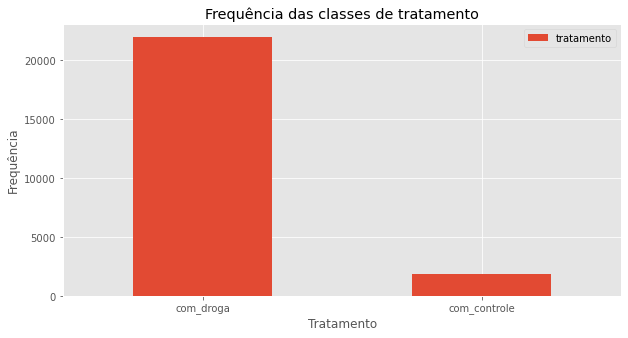

In [35]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5))
dataset['tratamento'].value_counts().plot.bar(title='Frequência das classes de tratamento')
plt.xlabel('Tratamento')
plt.ylabel('Frequência')
plt.xticks(rotation = 0)
plt.legend()

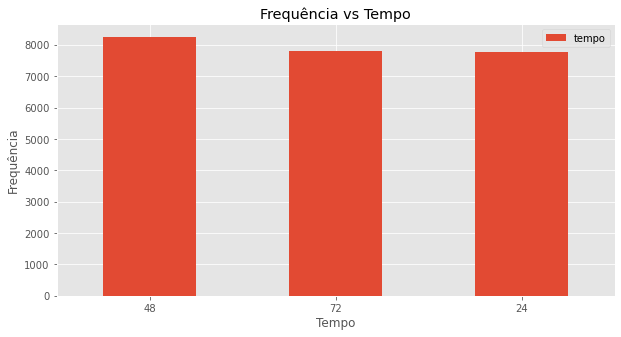

In [36]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5))
dataset['tempo'].value_counts().plot.bar(title='Frequência vs Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequência')
plt.xticks(rotation = 0)
plt.legend()

### Desafio 08: Resumo do que você aprendeu com os dados

Nessa primeira aula, que utilizamos um dataset complicado de uma area bem específica, foi possivel entender melhor de como os dados funcionam e sua estrutura, com poucas linhas de código e pouco entendimento de negócio.

- Podemos observar que estamos trabalhando com um dataset que é formado por 23.814 linhas e 877 coluna.
- Foram utilizados 3289 tipos de drogas nesse dataset.
- Tivemos dados desbalançeados na coluna ```tratamento```, onde é possível observar que em um dataset com 23.814 registros, somente 1.866 desses registros foram utilizadas o tratamento ```com_controle``` que equivale a aproximadamente 8% do dataset, e o restante 21.948 foram utilizadas o tratamento ```com_droga``` que é equivalente a 92% do dataset.
- E de forma pessoal, foi possivel aprender a utilizar o método ```.query``` do pandas, um método de filtragem na qual nunca havia utilizado antes, e com certeza, irei utilizar daqui para frente.